### Problem definition

* Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.


### Workflow for this notebook
1. problem definition
2. Wrangle, prepare, cleanse the data
2. EDA (Exploratory Data Analysis) - Analyze, identify patterns, and explore the data
3. Acquire training and testing data
4. Model, predict and solve the problem
5. Visualize, report, and present the problem solving steps and final solution


In [30]:
#required libs 

# linear algebra
import numpy as np 

#data frame
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Wrangle Data

In [5]:
# read data 
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test =pd.read_csv('/kaggle/input/titanic/test.csv')

In [6]:
# combine data frame
df = df_train.copy()

### EDA (Exploratory Data Analysis)

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
(df.isnull().sum()/df.shape[0])*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Engineer 

In [11]:
df['Survived'] = df['Survived'].map({0:'NO', 1:'Yes'})
df['Pclass'] = df['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Title']= df['Name'].str.extract(' ([A-Za-z]+)\.')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FarePerPerson'] = (df['Fare']+0.1) / (df['SibSp'] + df['Parch'] + 1)

In [12]:
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Jonkheer', 'Don'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [13]:
df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

### Visualize Data 

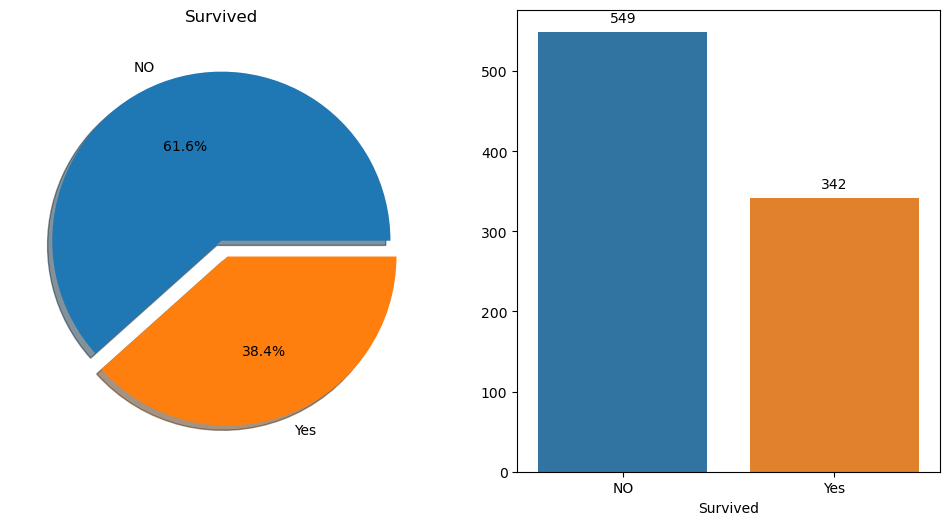

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#Bar chart - count
sns.countplot(data=df, x="Survived",ax=ax[1])
# ax[1].set_title('Survived')
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

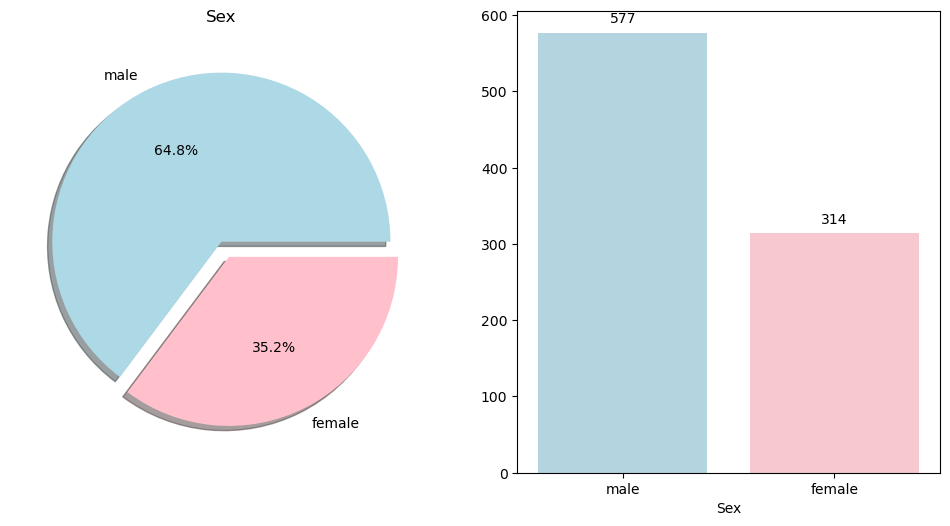

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#ADD8E6', '#FFC0CB']

df['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,colors=colors)
ax[0].set_title('Sex')
ax[0].set_ylabel('')

#Bar chart - count
sns.countplot(data=df, x="Sex",ax=ax[1],palette=colors)
ax[1].set_ylabel('')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()

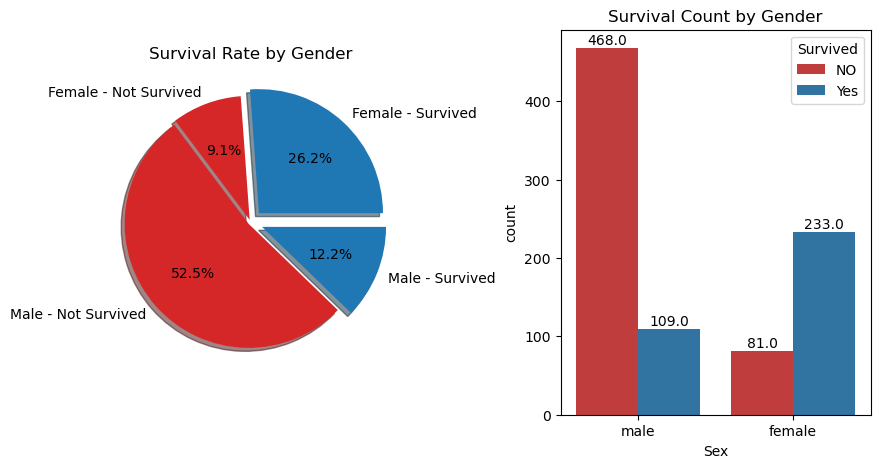

In [16]:
SexSurvivedgrouped = df.groupby('Sex')['Survived'].value_counts()


palette = {'Yes': '#1f77b4', 'NO': '#d62728'}
labels = ['Female - Survived', 'Female - Not Survived', 'Male - Not Survived', 'Male - Survived']
values = [SexSurvivedgrouped['female']['Yes'], SexSurvivedgrouped['female']['NO'], SexSurvivedgrouped['male']['NO'], SexSurvivedgrouped['male']['Yes']]


fig, axs = plt.subplots(ncols=2, figsize=(10, 5))


axs[0].pie(values, labels=labels, autopct='%1.1f%%', shadow=True,explode=[0.1, 0.02, 0.02, 0.1], colors=[palette['Yes'], palette['NO'], palette['NO'], palette['Yes']])
axs[0].set_title('Survival Rate by Gender')


sns.countplot(data=df, x="Sex", hue="Survived", ax=axs[1],palette=palette)
axs[1].set_title('Survival Count by Gender')

# Add annotations to the countplot
for p in axs[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 5
    axs[1].annotate(count, (x, y), ha='center')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


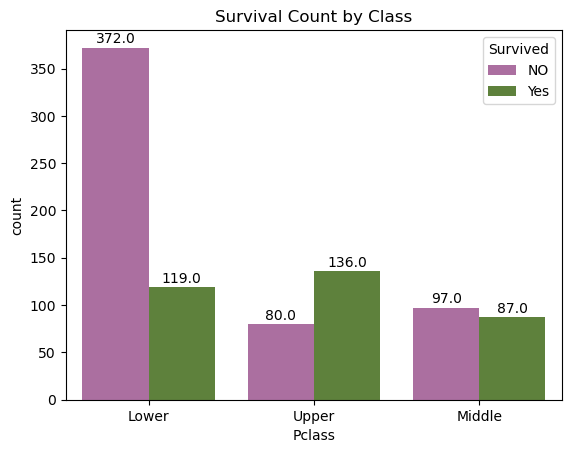

In [17]:
palette = {'Yes': '#5E8C31', 'NO': '#B565A7'}

# Create the countplot
ax = sns.countplot(data=df, x="Pclass", hue="Survived", palette=palette)

# Add title to the plot
ax.set_title('Survival Count by Class')

# Add annotations to the plot
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 5
    ax.annotate(count, (x, y), ha='center')

# Show the plot
plt.show()

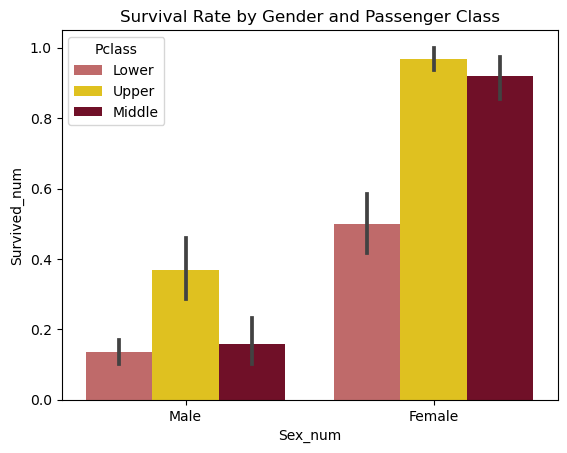

In [18]:
df['Survived_num'] = df['Survived'].map({'NO': 0, 'Yes':1})
df['Pclass_num'] = df['Pclass'].map({'Upper':1, 'Middle':2, 'Lower':3})
df['Sex_num'] = df['Sex'].map({ 'male':0, 'female':1})

palette = {'Upper': '#FFD700', 'Middle': '#800020', 'Lower': '#CD5C5C'}
sns.barplot(data=df, x='Sex_num', y='Survived_num', hue='Pclass', palette=palette)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Survival Rate by Gender and Passenger Class')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


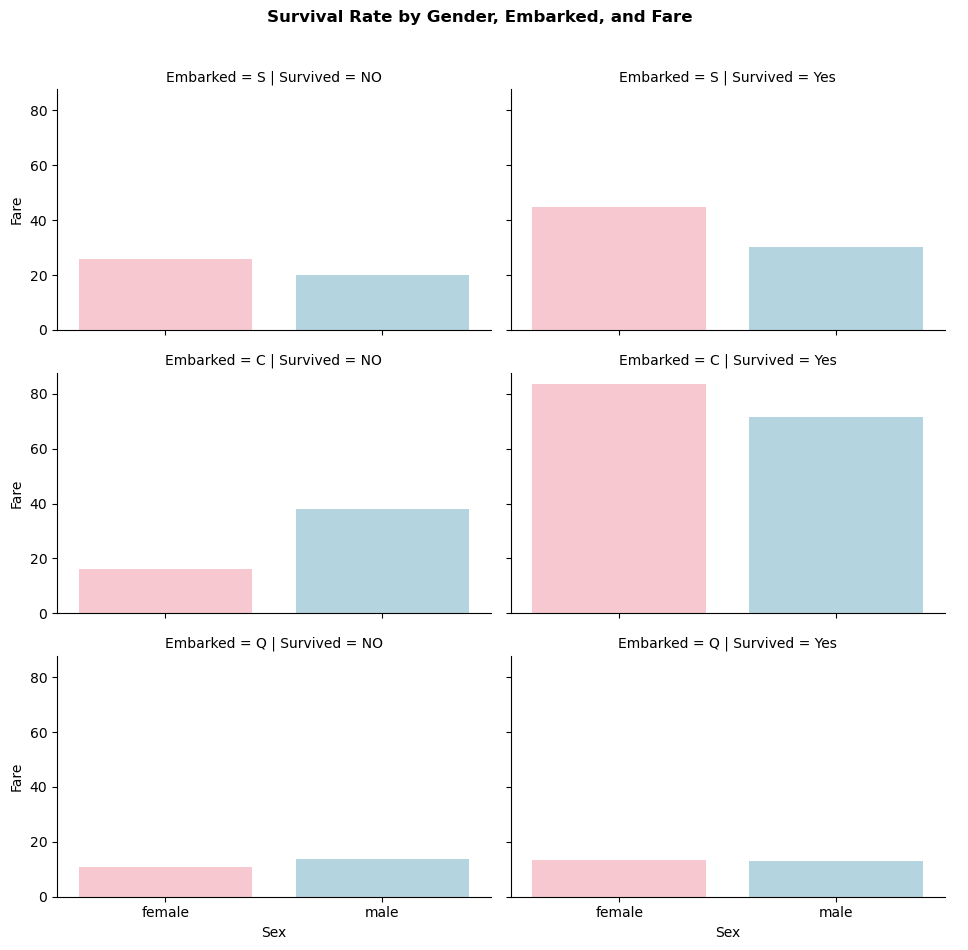

In [19]:
palette = {'female': '#FFC0CB', 'male': '#ADD8E6'}
grid = sns.FacetGrid(df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', errorbar=None, order=['female', 'male'], palette=palette)
grid.add_legend()
plt.suptitle('Survival Rate by Gender, Embarked, and Fare',fontweight='bold', y=1.05)

plt.show()

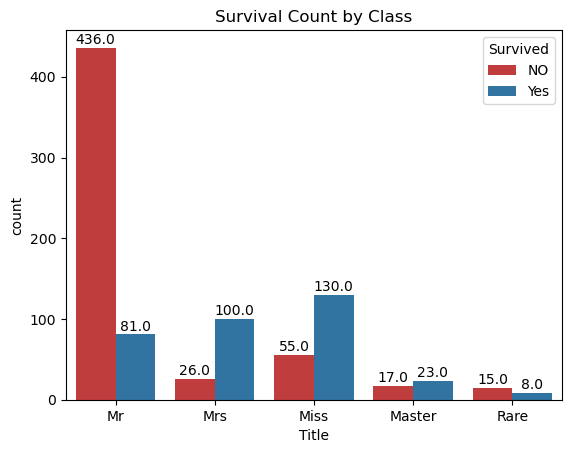

In [20]:
palette = {'Yes': '#1f77b4', 'NO': '#d62728'}

# Create the countplot
ax = sns.countplot(data=df, x="Title", hue="Survived", palette=palette)

# Add title to the plot
ax.set_title('Survival Count by Class')

# Add annotations to the plot
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + count + 5
    ax.annotate(count, (x, y), ha='center')

# Show the plot
plt.show()

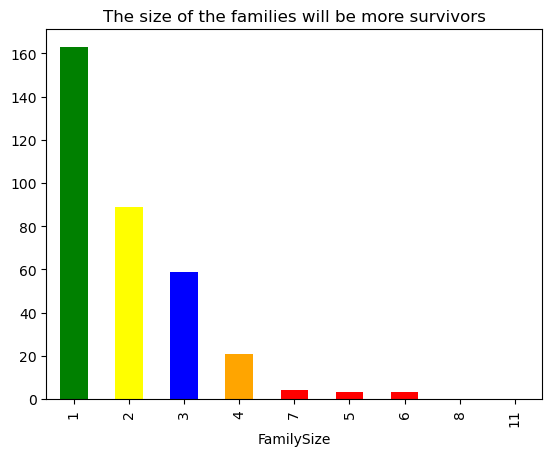

In [21]:
df.groupby('FamilySize')['Survived_num'].sum().sort_values(ascending=False).plot(kind='bar', color=['green', 'yellow', 'blue', 'orange','red','red','red'])
plt.title('The size of the families will be more survivors');

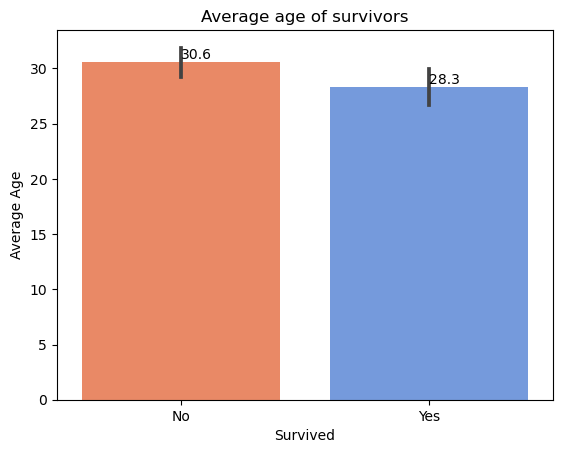

In [22]:
df_no_null = df[~df['Age'].isnull()].copy()
palette = ['#FF7F50', '#6495ED']
ax = sns.barplot(data=df_no_null, x='Survived_num', y='Age', palette=palette)
ax.set_xticklabels(['No', 'Yes'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width()/2, height)
                , va='bottom', fontsize=10)

plt.title('Average age of survivors')
plt.xlabel('Survived')
plt.ylabel('Average Age')

plt.show()

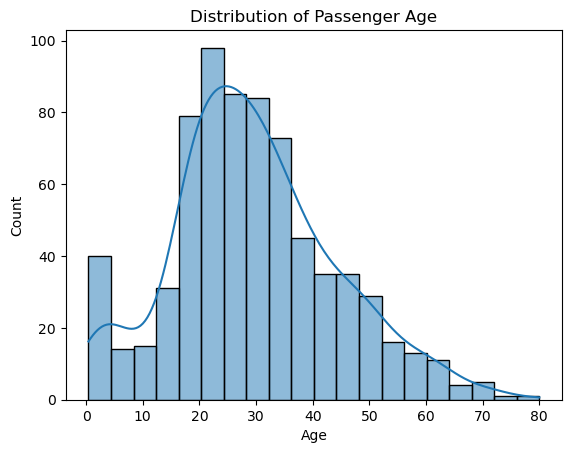

In [23]:
sns.histplot(df['Age'],kde=True,)

# Set the plot title and axis labels
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

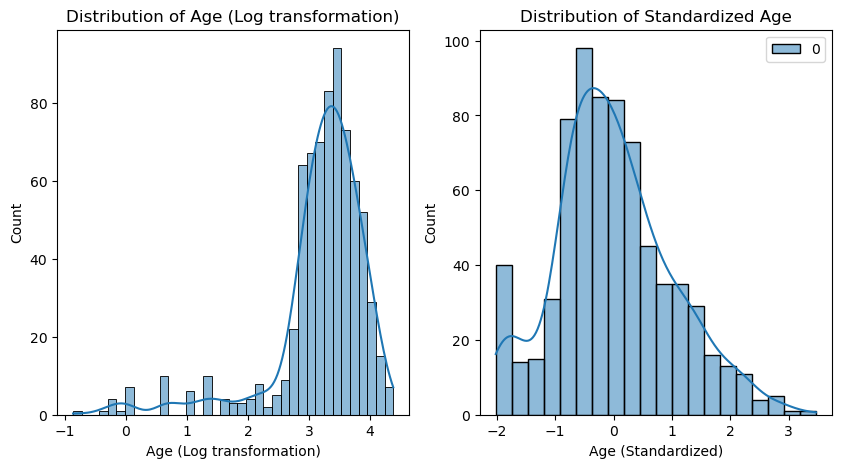

In [24]:
ss = StandardScaler()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(np.log(df['Age']), kde=True, ax=axs[0])
axs[0].set_title('Distribution of Age (Log transformation)')
axs[0].set_xlabel('Age (Log transformation)')
axs[0].set_ylabel('Count')

sns.histplot(ss.fit_transform(df[['Age']]), kde=True, ax=axs[1])
axs[1].set_title('Distribution of Standardized Age')
axs[1].set_xlabel('Age (Standardized)')
axs[1].set_ylabel('Count')

plt.show()

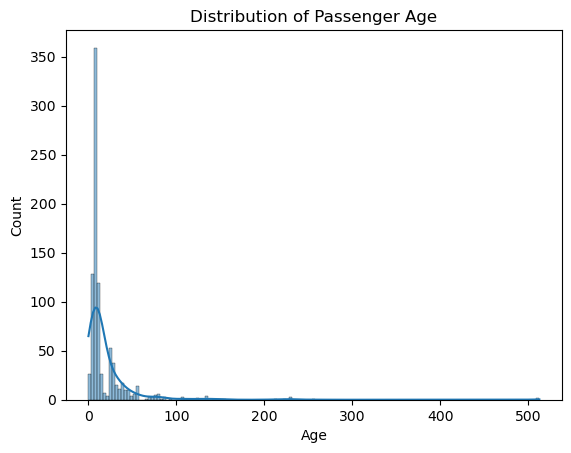

In [25]:
sns.histplot(df['FarePerPerson'],kde=True,)

# Set the plot title and axis labels
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

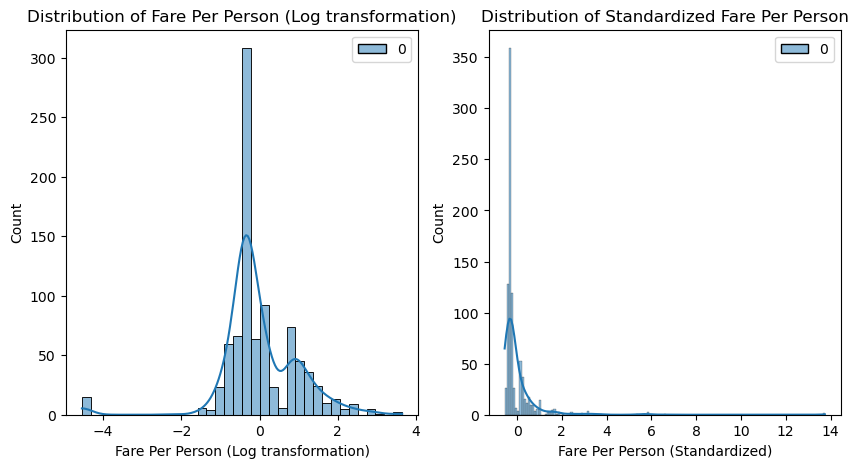

In [26]:
ss = StandardScaler()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
sns.histplot(ss.fit_transform(np.log(df[['FarePerPerson']])), kde=True, ax=axs[0])
axs[0].set_title('Distribution of Fare Per Person (Log transformation)')
axs[0].set_xlabel('Fare Per Person (Log transformation)')
axs[0].set_ylabel('Count')

sns.histplot(ss.fit_transform(df[['FarePerPerson']]), kde=True, ax=axs[1])
axs[1].set_title('Distribution of Standardized Fare Per Person')
axs[1].set_xlabel('Fare Per Person (Standardized)')
axs[1].set_ylabel('Count')

plt.show()

- log transformation better for `Fare` column
- standard better for `Age` column

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FarePerPerson,Survived_num,Pclass_num,Sex_num
0,1,NO,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,3.67500,0,3,0
1,2,Yes,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.69165,1,1,1
2,3,Yes,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,8.02500,1,3,1
3,4,Yes,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.60000,1,1,1
4,5,NO,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.15000,0,3,0


In [28]:
df_new = df.drop(columns=['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin', 'Fare'])
df_new.head()

,Survived,Age,Embarked,Title,FamilySize,FarePerPerson,Survived_num,Pclass_num,Sex_num
0,NO,22.0,S,Mr,2,3.67500,0,3,0
1,Yes,38.0,C,Mrs,2,35.69165,1,1,1
2,Yes,26.0,S,Miss,1,8.02500,1,3,1
3,Yes,35.0,S,Mrs,2,26.60000,1,1,1
4,NO,35.0,S,Mr,1,8.15000,0,3,0


### Features Correlation with Survived

/tmp/ipykernel_32/2293469814.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_new.corr()
/tmp/ipykernel_32/2293469814.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


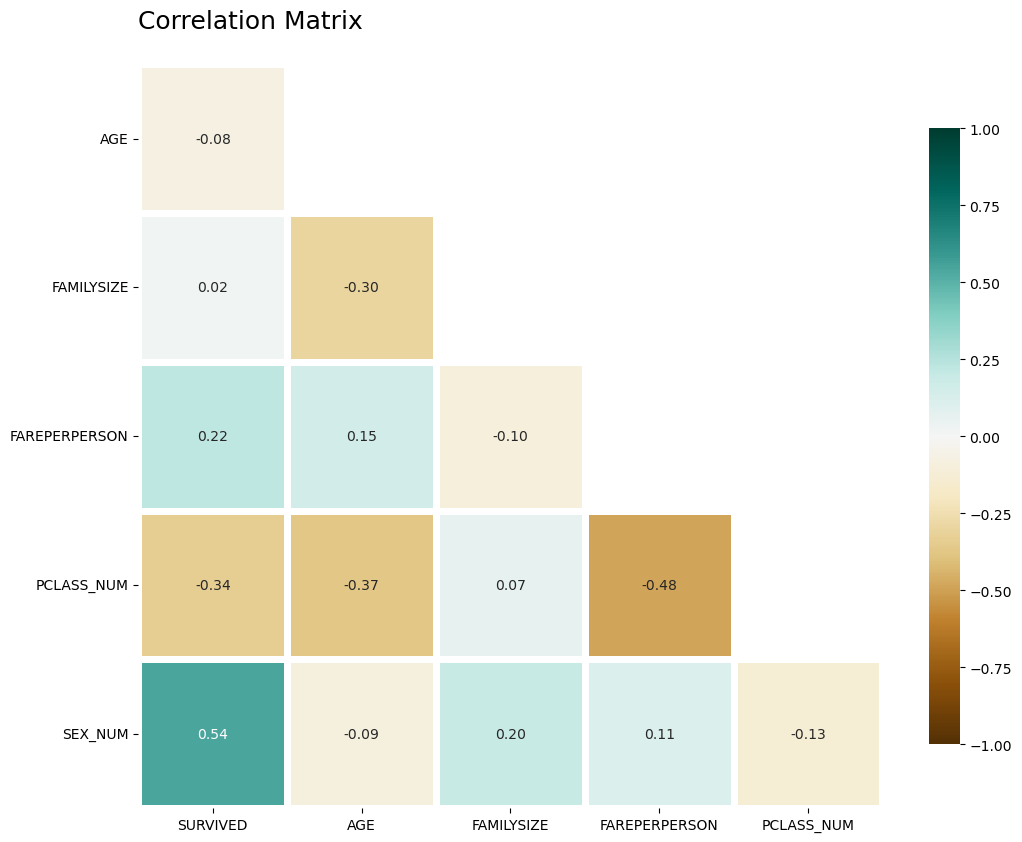

In [29]:
df_new = df_new.drop(columns=['Survived_num'])
df_new['Survived'] = df_new['Survived'].map({'NO':0,"Yes":1})
df_corr = df_new.corr()

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap='BrBG', vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Correlation Matrix\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

### Make Pipeline 
- **Feature engineering** 
- **Preprocessing**
    - One Hot Encoder for Nominal Columns
    - Label encoder for ordinal Columns 
    - log Transformation 
    - columns selection
- **KNN Imputer** 
- **PCA**
- **Random Forest Classifier**

In [32]:
def Create_Features(X):
    
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
    X['FarePerPerson'] =  (X['Fare']+0.4) / X['FamilySize']
    X['IsAlone'] = (X['FamilySize'] == 1).astype(int)
    X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    X['Title'] = X['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    X['Title'] = X['Title'].replace('Mlle', 'Miss')
    X['Title'] = X['Title'].replace('Ms', 'Miss')
    X['Title'] = X['Title'].replace('Mme', 'Mrs')

    # Drop unnecessary columns
    X = X.drop(['Name', 'SibSp', 'Parch','Fare', 'Ticket','Cabin','PassengerId'], axis=1)

    return X

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1),
                                                    df_train['Survived'],
                                                    test_size=0.2,
                                                    random_state=42)
nominal_cols = ['Sex', 'Embarked','Title']
ordinal_cols = ['Pclass', 'IsAlone']
NoSkewed_cols = ['Age']
Skewed_cols = ['FarePerPerson']

preprocessor = ColumnTransformer(
    transformers=[
        ('OHE', OneHotEncoder(drop='first'), nominal_cols),
        ('LabelEncoder_Pclass', OrdinalEncoder(), ordinal_cols),
        ('Log', FunctionTransformer(np.log), Skewed_cols),
        ('col', 'passthrough', NoSkewed_cols)
    ])

In [45]:
imputer = KNNImputer(n_neighbors=5, weights='distance')

pca = PCA(n_components=5, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_depth=7, min_samples_leaf= 1, min_samples_split=5, random_state=42)

# define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', imputer),
    ('pca', pca),
    ('rf', rf)
])


### Tuning Hyperparameter

```python
params = {
    'rf__n_estimators': [50, 75,100, 150, 200],
    'rf__max_depth': [None, 5, 7,10, 15, 20],
    'rf__min_samples_split': [2, 3, 5, 7],
    'rf__min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5,verbose=1)
X_train = Create_Features(X_train)

grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")
```
```output
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'rf__max_depth': 7, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best score: 0.830
```

In [46]:
X_train_new = Create_Features(X_train)
pipeline.fit(X_train, y_train)

# # evaluate the pipeline on the test data
score = pipeline.score(X_train_new, y_train)
print(f"Accuracy Train: {score:.3f}")

X_test_new = Create_Features(X_test)
score = pipeline.score(X_test_new, y_test)
print(f"Accuracy Test: {score:.3f}")

Accuracy: 0.897
Accuracy: 0.844


### Matric Evaluation

In [44]:
y_pred = pipeline.predict(X_test_new)
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [38]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[95 10]
 [18 56]]


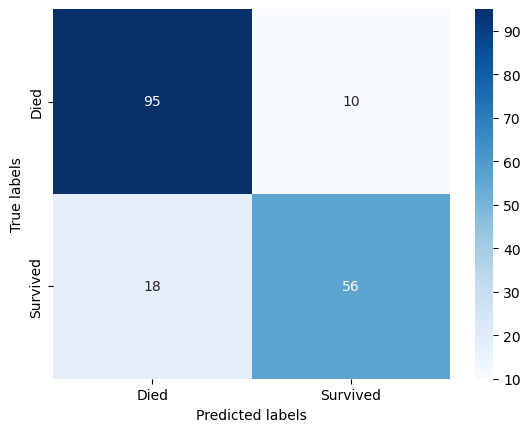

In [40]:
labels = ['Died', 'Survived']
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()